<a href="https://colab.research.google.com/github/mashyko/YOLO-how-to-train/blob/main/Yolo8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ultralytics YOLOv8 Docs:   
https://docs.ultralytics.com/modes/predict/

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 4.1 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO('yolov8n.pt')

In [ ]:
# Define path to the image file
source='https://ultralytics.com/images/bus.jpg'

# Run inference on the source
results = model.predict(source, save=True, imgsz=320, conf=0.5)  # list of Results objects



Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 320x256 3 persons, 1 bus, 174.0ms
Speed: 1.8ms preprocess, 174.0ms inference, 8.4ms postprocess per image at shape (1, 3, 320, 256)
Results saved to runs/detect/predict3


In [ ]:

# View results
for r in results:
    print(r.boxes)  # print the Boxes object  containing the detection bounding boxes


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 5., 0., 0.])
conf: tensor([0.8654, 0.7930, 0.7389, 0.6611])
data: tensor([[4.6161e+01, 3.9349e+02, 2.3379e+02, 9.0879e+02, 8.6540e-01, 0.0000e+00],
        [1.3799e+01, 2.2631e+02, 8.0164e+02, 7.5418e+02, 7.9300e-01, 5.0000e+00],
        [2.2139e+02, 4.0339e+02, 3.5001e+02, 8.5449e+02, 7.3890e-01, 0.0000e+00],
        [6.6926e+02, 3.7419e+02, 8.0960e+02, 8.7274e+02, 6.6114e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([4, 6])
xywh: tensor([[139.9758, 651.1425, 187.6300, 515.3020],
        [407.7172, 490.2474, 787.8372, 527.8719],
        [285.6982, 628.9423, 128.6164, 451.0984],
        [739.4311, 623.4642, 140.3433, 498.5555]])
xywhn: tensor([[0.1728, 0.6029, 0.2316, 0.4771],
        [0.5034, 0.4539, 0.9726, 0.4888],
        [0.3527, 0.5824, 0.1588, 0.4177],
        [0.9129, 0.5773, 0.1733, 0.4616]])
xyxy: tensor([[ 46.1608, 393.4915, 233.7908, 908.7935],
        [ 13.798

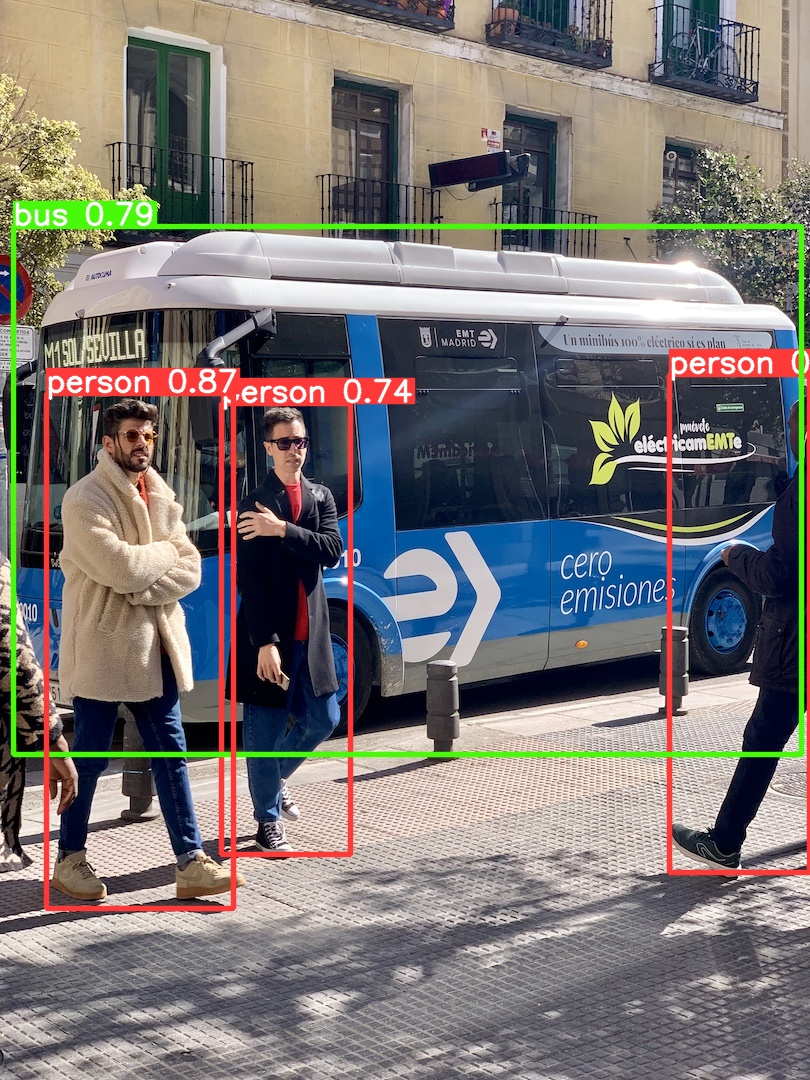

In [ ]:
# Display the results
from IPython.display import Image, clear_output  # to display images
Image(filename='runs/detect/predict2/bus.jpg')




When you are in Colab, please don't run and skip the next cell.

In [ ]:
import cv2
#from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

# Open the video file
cap = cv2.VideoCapture(0)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        results = model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imshow("YOLOv8 Inference", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

In [ ]:
# load the pretrained yolov8n-seg.pt model
model = YOLO('yolov8n-seg.pt')

# Predict with segmentation
results = model.predict(source, save=True, imgsz=320, conf=0.5)

Train the model using COCO128.
https://github.com/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb


In [ ]:
from ultralytics import YOLO

# Train YOLOv8n on COCO128 for 3 epochs
model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
model.train(data='coco128.yaml', epochs=3)  # train the model
#model('https://ultralytics.com/images/bus.jpg')  # predict on an image

In [ ]:

model('https://ultralytics.com/images/bus.jpg', save=True)  # predict on an image

/root/runs/detect/train
bus.jpg
/root


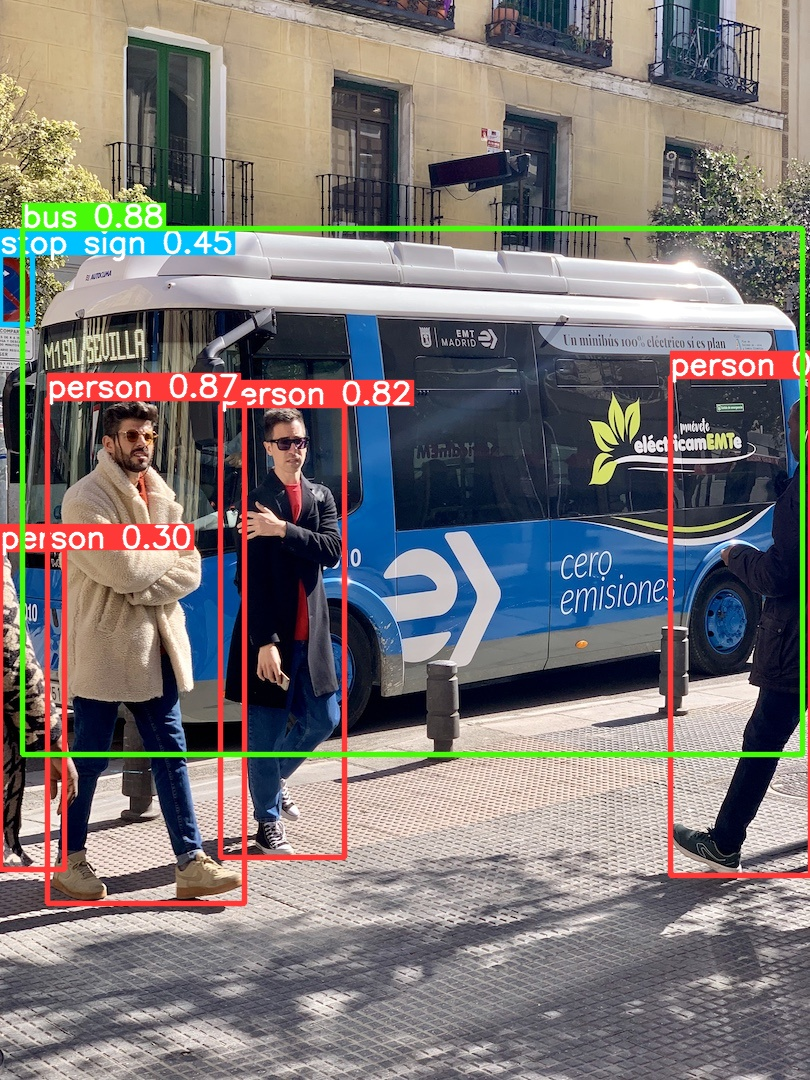

In [ ]:

# Display the results
from IPython.display import Image, clear_output  # to display images
Image(filename='runs/detect/train/bus.jpg')
